# Подготовка: Основные библиотеки и загрузка данных

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Загрузим данные:

In [ ]:
all_data = pd.read_csv('TV_Shows.csv', header=None)
print(all_data)

                 0              1                   2                 3   \
0         Cobra Kai          Lupin          12 Monkeys          Sherlock   
1              Lost      Jack Ryan           The Flash   Game of thrones   
2     Sex Education      Dr. House             Kingdom  The Walking Dead   
3             Ozark  Sex Education         Constantine          Preacher   
4            Naruto            NaN                 NaN               NaN   
...             ...            ...                 ...               ...   
9685      One Piece  The Blacklist  Two and a half men             Lupin   
9686      One Piece      Mr. Robot          Succession             Ozark   
9687      Daredevil       Atypical               Heros               NaN   
9688       Absentia   The Newsroom        The Alienist               NaN   
9689       Atypical            NaN                 NaN               NaN   

                  4                      5                    6       7   \
0          

## Анализ датасета

Длина транзакций (сколько сериалов в среднем смотрит человек)

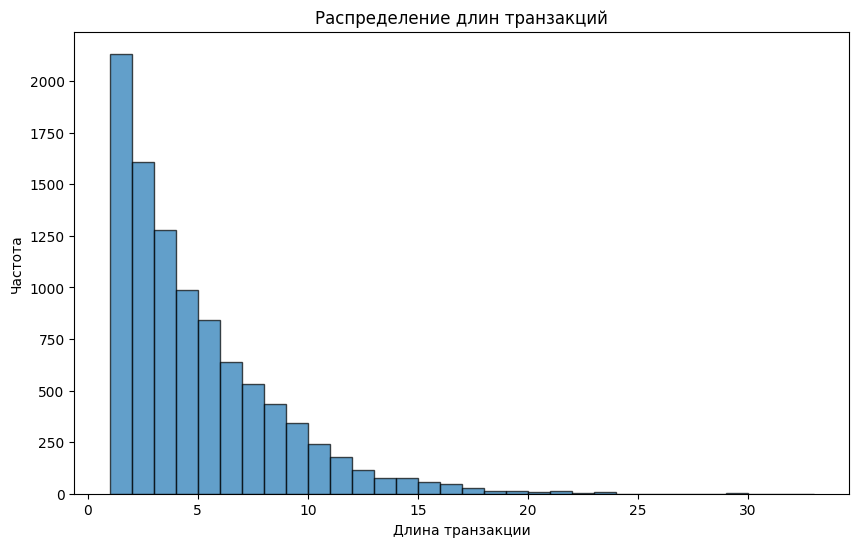

In [123]:
transaction_lengths = all_data.notnull().sum(axis=1)

plt.figure(figsize=(10, 6))
plt.hist(transaction_lengths, bins=range(1, max(transaction_lengths)+2), edgecolor='black', alpha=0.7)
plt.xlabel('Длина транзакции')
plt.ylabel('Частота')
plt.title('Распределение длин транзакций')
plt.show()

Очистка данных

In [124]:
np_data = all_data.to_numpy()
np_data = [[elem for elem in row[1:] if isinstance(elem,str)] for row in np_data]

print(f"Загружено {len(np_data)} транзакций.")

Загружено 9690 транзакций.


Уникальные товары (сериалы)

In [125]:
unique_items = set()
for row in np_data:
    for elem in row:
        unique_items.add(elem)
print(f"Всего уникальных сериалов: {len(unique_items)}")
print(unique_items)

Всего уникальных сериалов: 155
{'Emily in Paris', 'Kingdom', 'Heros', 'The Umbrella Academy', 'Goliath', 'Person of Interest', 'Doctor Who', 'The Originals', 'Haven', 'Mr. Robot', "The Queen's Gambit", 'Orphan Black', 'The Tick', 'Love Death Robots', 'The Innocent', 'Death Note', 'Chernobyl', 'Better Call Saul', 'Demon Slayer', 'The Night Manager', 'Two and a half men', 'The Expanse', 'X-Files', 'Lupin', 'Game of thrones', 'The Stranger', 'Archer', 'Space Force', 'The Walking Dead', 'How I met your mother', 'Westworld', 'Only Murders in the building', 'Sneaky Pete', 'Constantine', 'Jack Ryan', 'Dark', 'Succession', 'Inhumans', 'Lost', 'Upload', 'Fringe', 'Gotham', 'Lost in Space', 'Banshee', 'Lucifer', 'Narcos', 'Perception', 'Preacher', 'Teen Wolf', 'House of Cards', 'Sons of Anarchy', 'Arrow', 'Madmen', 'True Detective', 'The Witcher', 'Iron Fist', 'Sex Education', "Grey's Anatomy", 'Spartacus', 'Supernatural', 'The Vampire Diaries', 'Travellers', 'One Piece', 'The Newsroom', 'Big Li

Частота упоминаний каждого сериала

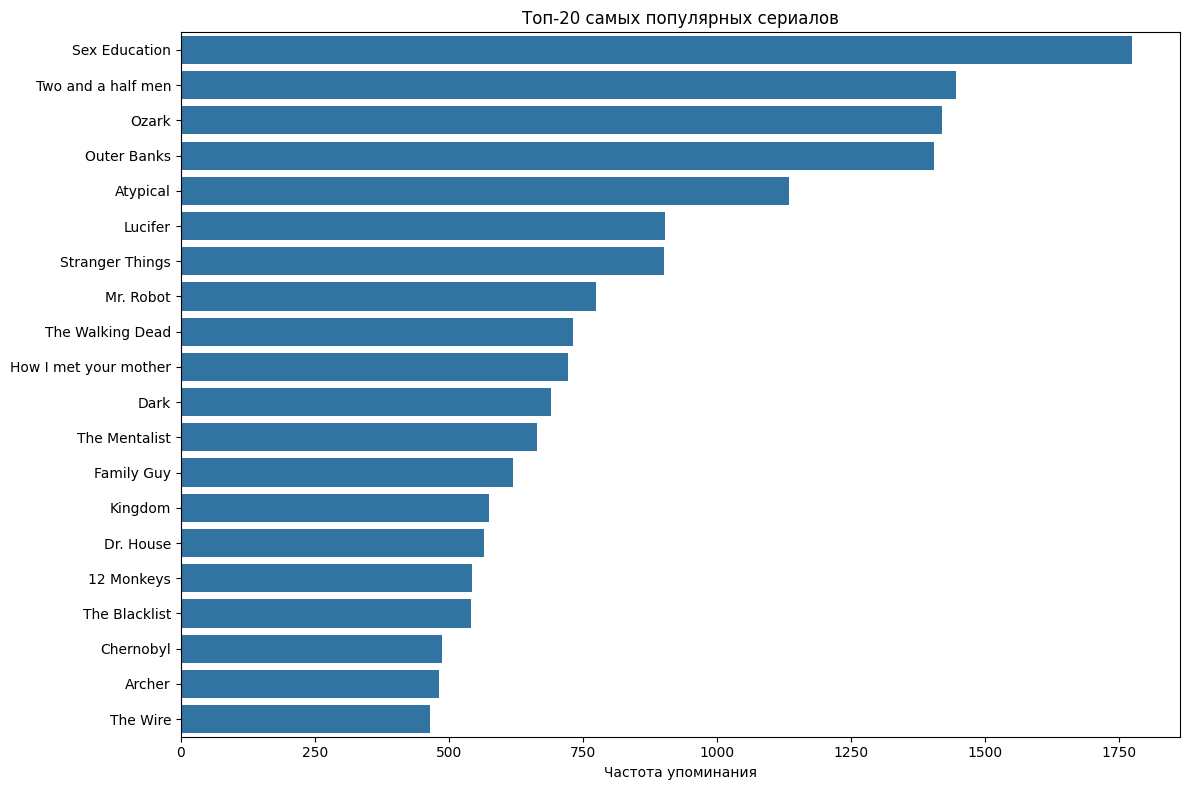

In [126]:
from collections import Counter

item_counts = Counter([item for trans in np_data for item in trans])
top_items = item_counts.most_common(20)

plt.figure(figsize=(12, 8))
items, counts = zip(*top_items)
sns.barplot(x=counts, y=items)
plt.title('Топ-20 самых популярных сериалов')
plt.xlabel('Частота упоминания')
plt.tight_layout()
plt.show()

Подготовка данных: one-hot encoding (TransactionEncoder)

In [127]:
te = TransactionEncoder()
te_ary = te.fit(np_data).transform(np_data)
data = pd.DataFrame(te_ary, columns=te.columns_)
print("Размер закодированного датасета:", data.shape)
data.head()

Размер закодированного датасета: (9690, 155)


,12 Monkeys,24,Absentia,Alice in Borderland,Altered Carbon,American Gods,Another Life,Archer,Arrow,Atypical,...,True Detective,Two and a half men,Upload,Vikings,Watchmen,Westworld,White Collar,X-Files,You,Young Sheldon
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Алгоритм Apriori

Запуск Apriori с min_support=0.03

In [ ]:
df1 = apriori(data, min_support=0.02, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold = 0.3)
print(rules)

     support                               itemsets
0   0.056037                           (12 Monkeys)
1   0.045924                             (Absentia)
2   0.023220                  (Alice in Borderland)
3   0.049639                               (Archer)
4   0.117131                             (Atypical)
..       ...                                    ...
77  0.025181         (Sex Education, The Blacklist)
78  0.022910         (Sex Education, The Mentalist)
79  0.026935      (Sex Education, The Walking Dead)
80  0.046027    (Sex Education, Two and a half men)
81  0.021672  (Stranger Things, Two and a half men)

[82 rows x 2 columns]
             antecedents      consequents  antecedent support  \
0           (12 Monkeys)  (Sex Education)            0.056037   
1           (Family Guy)       (Atypical)            0.063880   
2             (Atypical)          (Ozark)            0.117131   
3             (Atypical)  (Sex Education)            0.117131   
4       (Berlin Station)  (S

Топ-10 самых частых наборов по поддержке (support):

     support               itemsets
33  0.183179          Sex Education
46  0.149226     Two and a half men
29  0.146543                  Ozark
28  0.144995            Outer Banks
4   0.117131               Atypical
24  0.093292                Lucifer
36  0.093086        Stranger Things
26  0.079876              Mr. Robot
42  0.075439       The Walking Dead
19  0.074613  How I met your mother


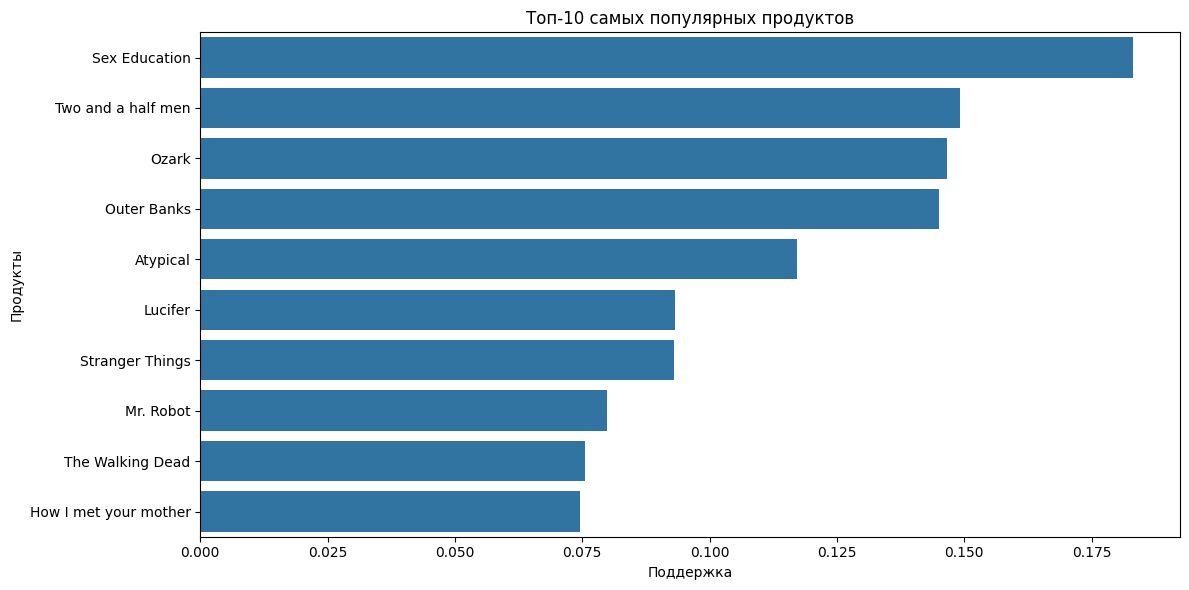

Получено 21 правил при min_confidence=0.03


,antecedents,consequents,support,confidence,lift,conviction
0,12 Monkeys,Sex Education,0.020124,0.359116,1.960470,1.274523
1,Family Guy,Atypical,0.020124,0.315024,2.689502,1.288905
2,Atypical,Ozark,0.036945,0.315419,2.152398,1.246685
3,Atypical,Sex Education,0.047162,0.402643,2.198091,1.367393
4,Berlin Station,Sex Education,0.023323,0.488121,2.664728,1.595731
5,Demon Slayer,Ozark,0.020537,0.431670,2.945694,1.501694
6,Demon Slayer,Sex Education,0.021156,0.444685,2.427607,1.470917
7,Dr. House,Sex Education,0.026832,0.459364,2.507739,1.510853
8,Family Guy,Ozark,0.025077,0.392569,2.678866,1.405027
9,Family Guy,Sex Education,0.028070,0.439418,2.398853,1.457097


In [129]:
df1['itemsets'] = df1['itemsets'].apply(lambda x: ', '.join(list(x)))
top_products = df1.sort_values(by='support', ascending=False).head(10)
print(top_products)
plt.figure(figsize=(12, 6))
sns.barplot(x='support', y='itemsets', data=top_products)
plt.title('Топ-10 самых популярных продуктов')
plt.xlabel('Поддержка')
plt.ylabel('Продукты')
plt.tight_layout()
plt.show()
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

print(f"Получено {len(rules)} правил при min_confidence=0.03")
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'conviction']].head(10)

График достоверности используемых правил

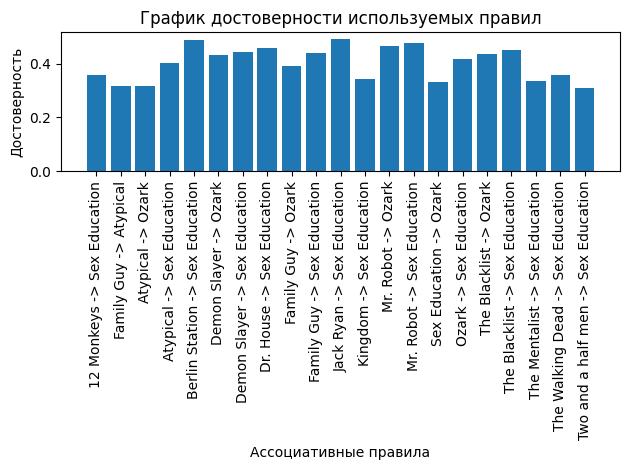

In [130]:
products_1 = rules["antecedents"].tolist()
products_2 = rules["consequents"].tolist()
confidence = rules["confidence"].tolist()
rules_labels = [f"{product1} -> {product2}" for product1, product2 in zip(products_1, products_2)]
plt.bar(rules_labels, confidence)
plt.xlabel("Ассоциативные правила")
plt.ylabel("Достоверность")
plt.title("График достоверности используемых правил")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Визуализация ассоциативных правил в виде графа

C:\Users\gorde\AppData\Local\Temp\ipykernel_14528\1234819423.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


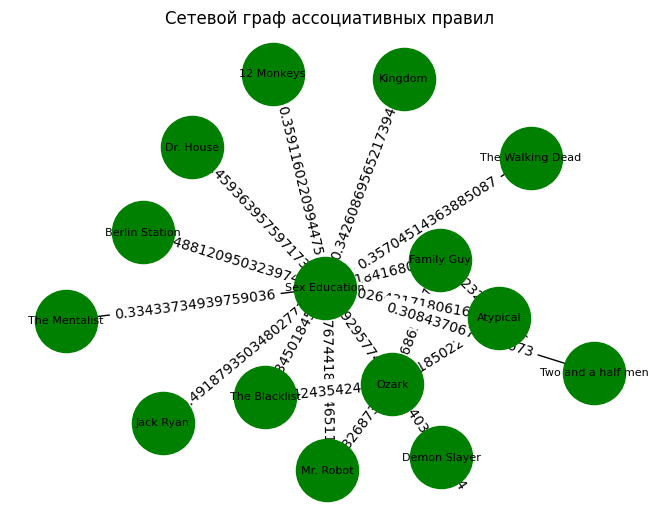

In [131]:
G = nx.Graph()
for product in rules["antecedents"]:
    G.add_node(product)
for product in rules["consequents"]:
    G.add_node(product)
for index, row in rules.iterrows():
    G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='green', font_size=8)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Сетевой граф ассоциативных правил')
plt.tight_layout()
plt.show()

# Алгоритм FPG

In [132]:
df1 = fpgrowth(data, min_support=0.02, use_colnames = True)
print(df1)
rules = association_rules(df1, metric = "confidence", min_threshold = 0.3)
rules_num = rules
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))
print(f"(FPG) Получено {len(rules)} правил при тех же порогах.")
print("Примеры правил FPG:")
rules[['antecedents', 'consequents', 'confidence', 'lift']]

     support                       itemsets
0   0.056037                   (12 Monkeys)
1   0.068524                (The Mentalist)
2   0.050258                    (Chernobyl)
3   0.044479                    (Jack Ryan)
4   0.031476                      (Vikings)
..       ...                            ...
77  0.020537          (Ozark, Demon Slayer)
78  0.021156  (Sex Education, Demon Slayer)
79  0.037255             (Ozark, Mr. Robot)
80  0.038080     (Sex Education, Mr. Robot)
81  0.020640          (Atypical, Mr. Robot)

[82 rows x 2 columns]
(FPG) Получено 21 правил при тех же порогах.
Примеры правил FPG:


,antecedents,consequents,confidence,lift
0,12 Monkeys,Sex Education,0.359116,1.960470
1,The Mentalist,Sex Education,0.334337,1.825199
2,Jack Ryan,Sex Education,0.491879,2.685246
3,The Walking Dead,Sex Education,0.357045,1.949165
4,Kingdom,Sex Education,0.342609,1.870354
5,Dr. House,Sex Education,0.459364,2.507739
6,Atypical,Sex Education,0.402643,2.198091
7,Atypical,Ozark,0.315419,2.152398
8,Two and a half men,Sex Education,0.308437,1.683806
9,The Blacklist,Sex Education,0.450185,2.457627


# Влияние параметров (min_support, min_confidence)

In [133]:
support_vals = [0.01, 0.02, 0.03, 0.05]
conf_vals = [0.3, 0.4, 0.5, 0.6]

results = []

for sup in support_vals:
    fps = fpgrowth(data, min_support=sup, use_colnames=True)
    if fps.empty: continue
    for conf in conf_vals:
        rules = association_rules(fps, metric="confidence", min_threshold=conf)
        n_rules = len(rules)
        avg_lift = rules['lift'].mean() if n_rules > 0 else 0
        results.append({
            'min_support': sup,
            'min_confidence': conf,
            'n_rules': n_rules,
            'avg_lift': avg_lift
        })

df_res = pd.DataFrame(results)
print(df_res)

    min_support  min_confidence  n_rules  avg_lift
0          0.01             0.3       78  2.620314
1          0.01             0.4       42  2.867491
2          0.01             0.5       16  3.134919
3          0.01             0.6        1  3.294318
4          0.02             0.3       21  2.399452
5          0.02             0.4       12  2.609208
6          0.02             0.5        0  0.000000
7          0.02             0.6        0  0.000000
8          0.03             0.3        7  2.336591
9          0.03             0.4        4  2.562924
10         0.03             0.5        0  0.000000
11         0.03             0.6        0  0.000000
12         0.05             0.3        2  2.268240
13         0.05             0.4        1  2.268240
14         0.05             0.5        0  0.000000
15         0.05             0.6        0  0.000000


Тепловая карта: количество правил

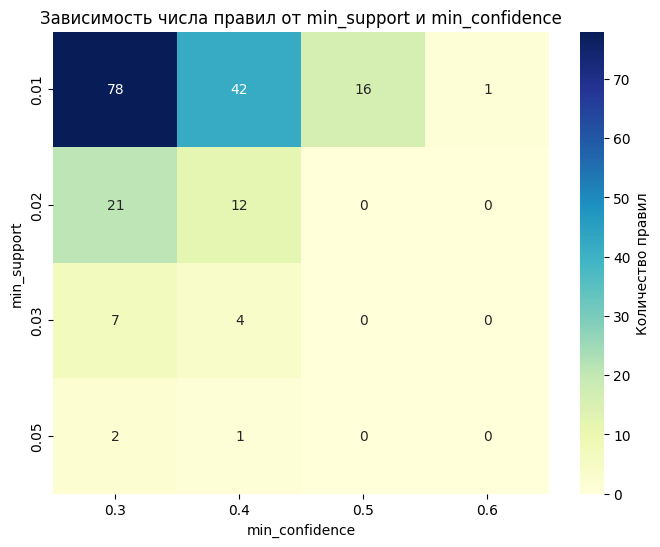

In [134]:
pivot = df_res.pivot(index='min_support', columns='min_confidence', values='n_rules')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt="g", cmap="YlGnBu", cbar_kws={'label': 'Количество правил'})
plt.title('Зависимость числа правил от min_support и min_confidence')
plt.show()

Достоверность (confidence) топ-20 правил

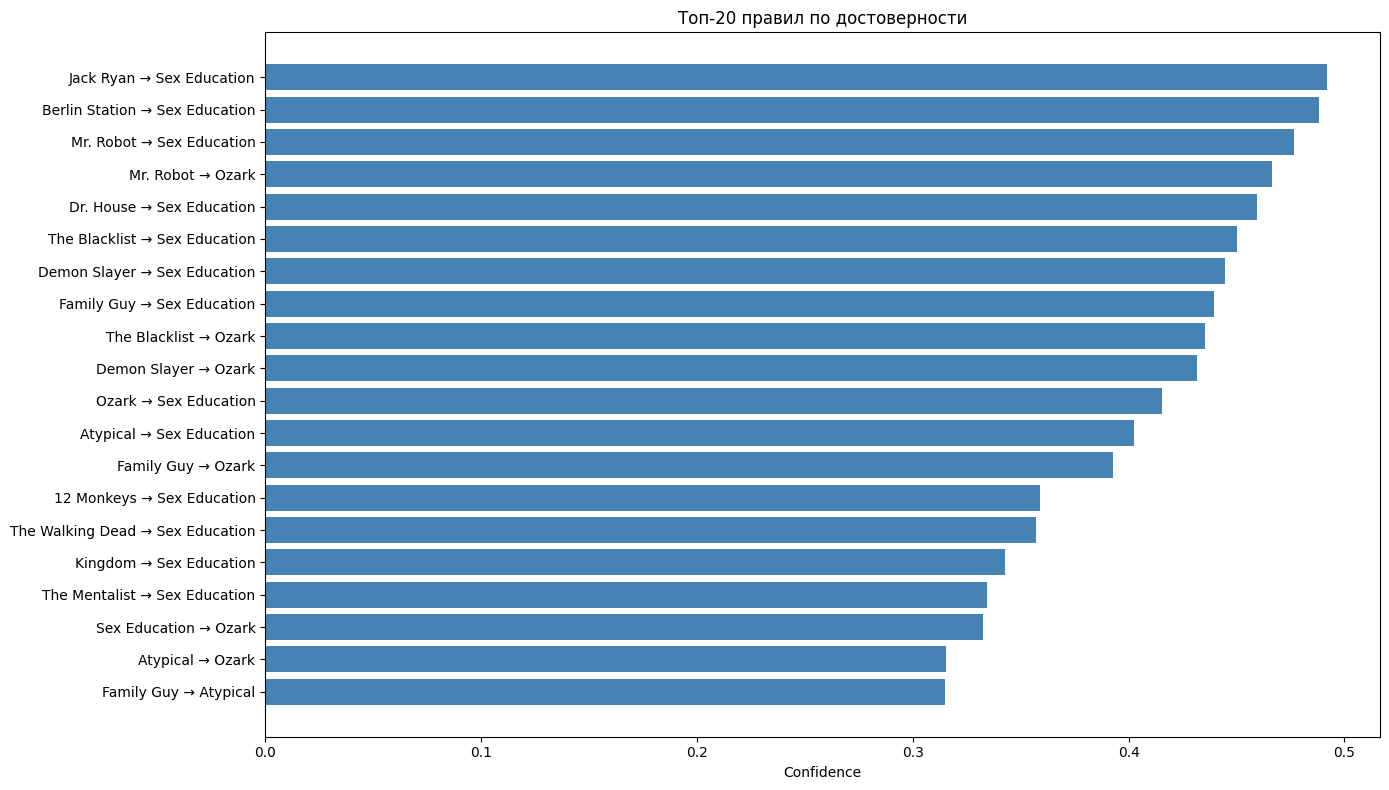

In [135]:
top_rules = rules_num.nlargest(20, 'confidence')
plt.figure(figsize=(14, 8))
plt.barh(range(len(top_rules)), top_rules['confidence'], color='steelblue')
plt.yticks(range(len(top_rules)), [f"{a} → {c}" for a, c in zip(top_rules['antecedents'], top_rules['consequents'])])
plt.xlabel('Confidence')
plt.title('Топ-20 правил по достоверности')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Оригинальная визуализация — scatter-plot: confidence vs lift

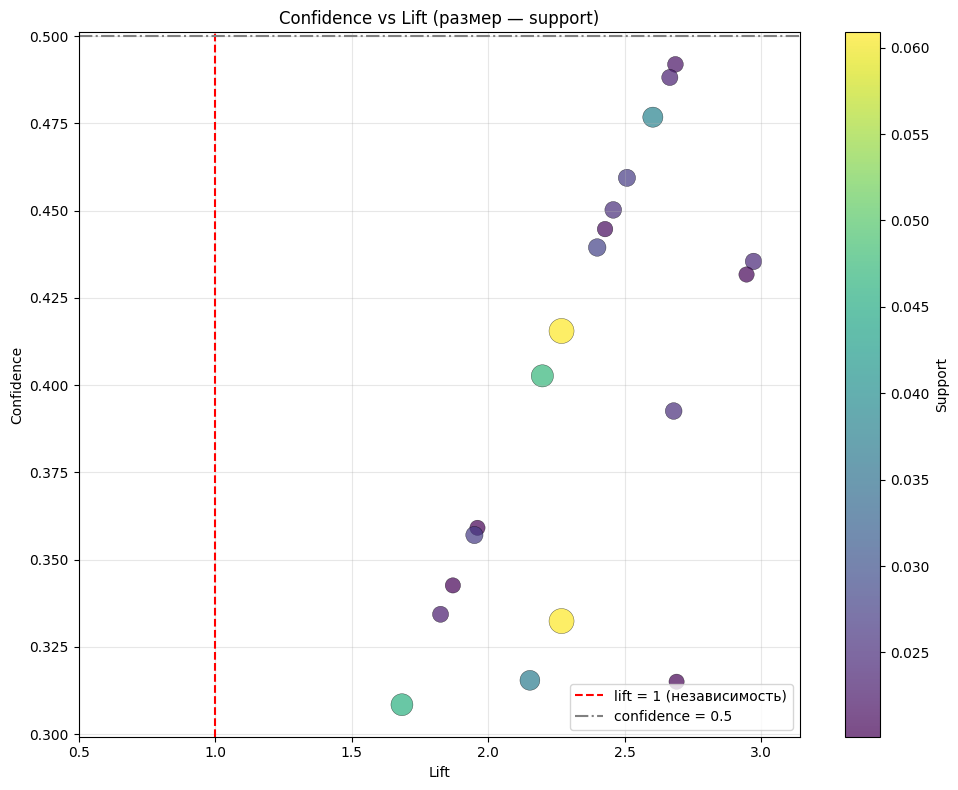

In [ ]:
plt.figure(figsize=(10, 8))

# Цвет — поддержка (support)
scatter = plt.scatter(
    rules_num['lift'],
    rules_num['confidence'],
    s=rules_num['support'] * 5000 + 20,  # размер ∝ support
    c=rules_num['support'], cmap='viridis', alpha=0.7, edgecolors='k', linewidth=0.3
)

# Пороги
plt.axvline(1.0, color='red', linestyle='--', label='lift = 1 (независимость)')
plt.axhline(0.5, color='gray', linestyle='-.', label='confidence = 0.5')

plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Confidence vs Lift (размер — support)')
plt.legend()
plt.colorbar(scatter, label='Support')
plt.grid(True, alpha=0.3)
plt.xlim(0.5, rules_num['lift'].quantile(0.99))  # убираем выбросы
plt.tight_layout()
plt.show()